# Predicting Stock Prices Using Regression on Moving Averages

In [3]:
# import necessary libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
warnings.filterwarnings('ignore')

## Simple Moving Average (SMA) - Meta

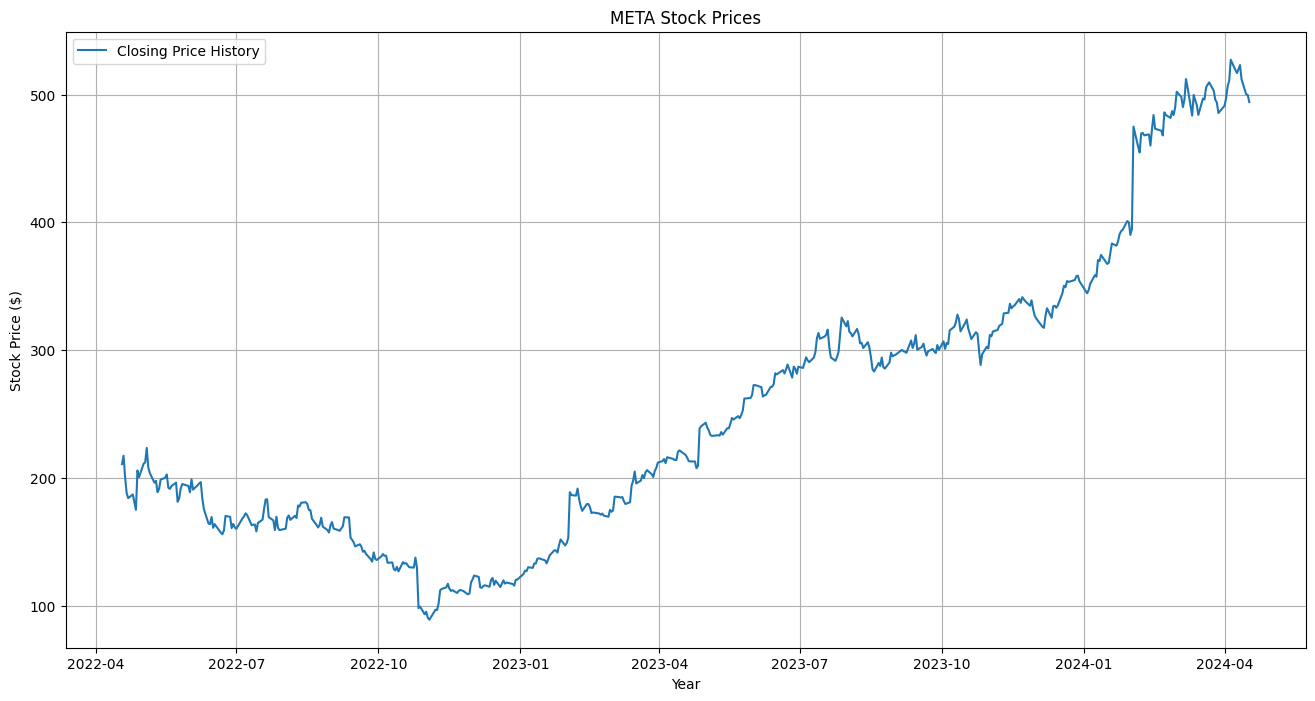

In [15]:
# import the closing price data of META stock for the period of 2 years
df = pd.read_csv('META.csv')

# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# sort by datetime
df.sort_values(by='Date', inplace=True, ascending=True)

plt.figure(figsize = (16,8))
plt.title('META Stock Prices')
plt.plot(df['Date'], df['Close'], label = 'Closing Price History')
plt.legend(loc = "upper left")
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.grid()
plt.show()

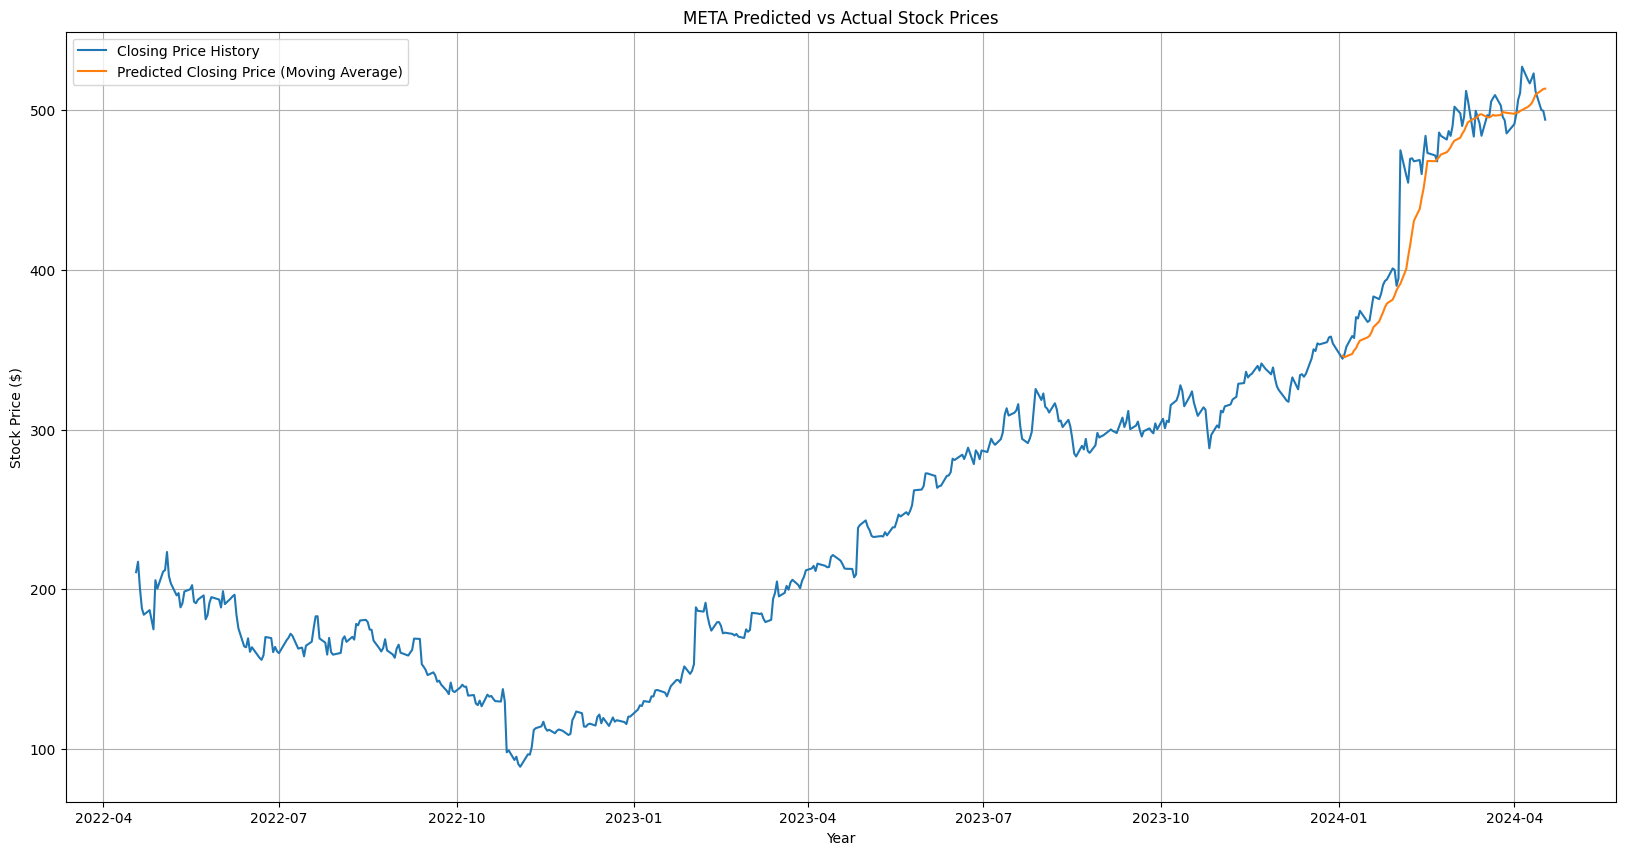

Root Mean Squared Error: 20.64487269431784
Mean Absolute Percentage Error (%): 3.3055273379334733


In [16]:
test_size = 0.2
training_size = 1 - test_size

test_num = int(test_size * len(df))
train_num = int(training_size * len(df))

train_end_date = '2024-01-01'
train = df[df['Date'] <= train_end_date]
test = df[df['Date'] > train_end_date]

preds = []
for i in range(0, test.shape[0]):
    a = train['Close'][len(train) - test.shape[0] + i:].sum() + test['Close'][:i].sum()
    b = a/test.shape[0]
    preds.append(b)


# Calculate the moving average with a rolling window
window_size = 10
test['Predictions_ma'] = test['Close'].rolling(window=window_size, min_periods=1).mean().shift(1)

# Fill any missing values in predictions using forward fill
test['Predictions_ma'].fillna(method='ffill', inplace=True)

combined_data = pd.concat([train, test])

#test['Predictions_ma'] = preds
plt.figure(figsize = (20,10))
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.plot(combined_data['Date'], combined_data['Close'], label='Closing Price History')
plt.plot(test['Date'], test['Predictions_ma'], label='Predicted Closing Price (Moving Average)')
plt.legend(loc = "upper left")
plt.title('META Predicted vs Actual Stock Prices')
plt.grid()
plt.show()

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def get_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean(np.power((y_true - y_pred),2)))
    return rmse

# Evaluate performance

# Drop rows with missing predictions
test = test.dropna(subset=['Predictions_ma'])

# Evaluate performance
if test['Close'].isnull().any() or test['Predictions_ma'].isnull().any():
    print("Error: There are missing values in the test data or predictions.")
else:
    rmse_ma = get_rmse(test['Close'], test['Predictions_ma'])
    print('Root Mean Squared Error: ' + str(rmse_ma))
    mape_ma = get_mape(test['Close'], test['Predictions_ma'])
    print('Mean Absolute Percentage Error (%): ' + str(mape_ma))

## Microsoft

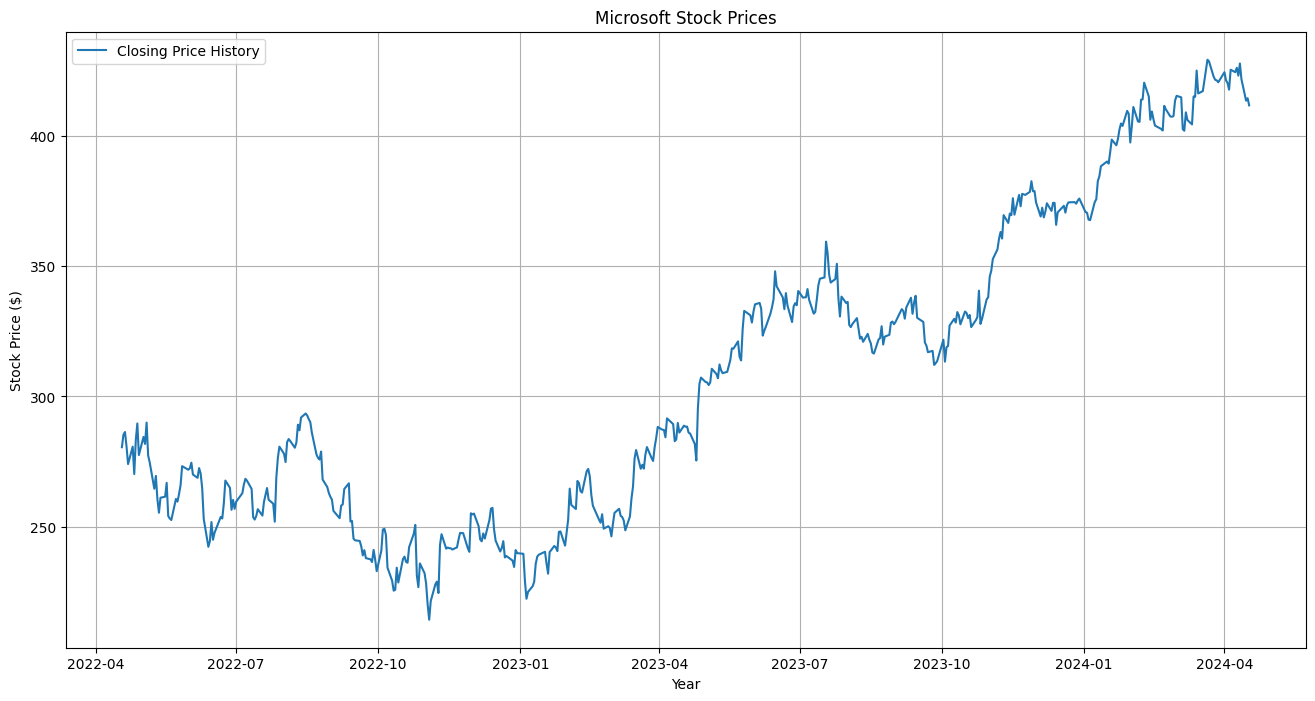

In [21]:
# import the closing price data of META stock for the period of 2 years
df = pd.read_csv('MSFT.csv')

# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# sort by datetime
df.sort_values(by='Date', inplace=True, ascending=True)

plt.figure(figsize = (16,8))
plt.title('Microsoft Stock Prices')
plt.plot(df['Date'], df['Close'], label = 'Closing Price History')
plt.legend(loc = "upper left")
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.grid()
plt.show()

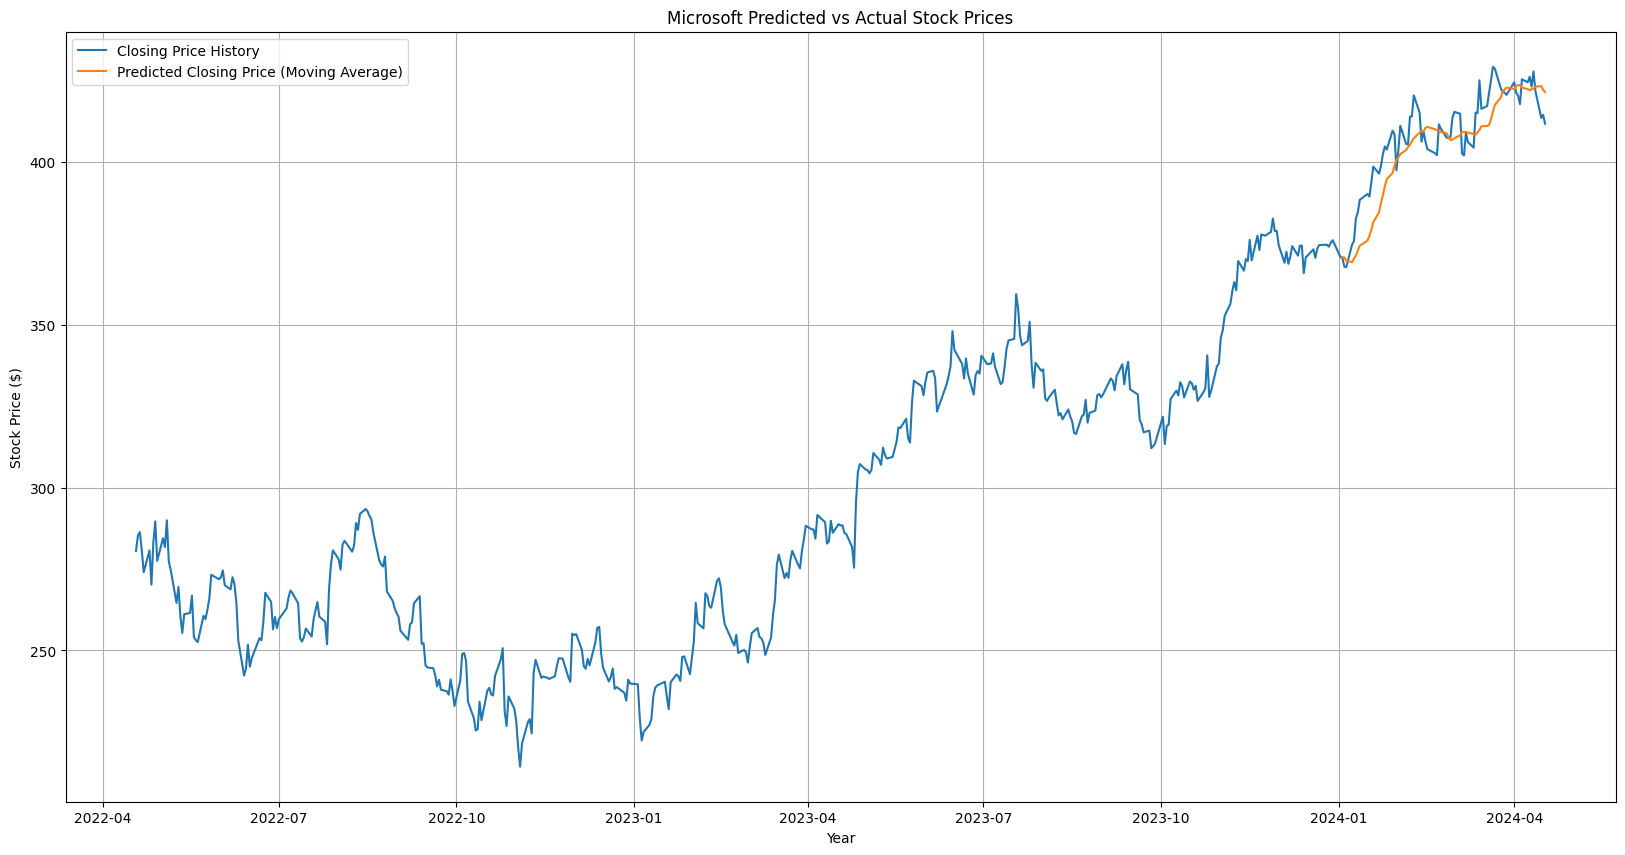

Root Mean Squared Error: 7.896426429631682
Mean Absolute Percentage Error (%): 1.5848672237533095


In [18]:
test_size = 0.2
training_size = 1 - test_size

test_num = int(test_size * len(df))
train_num = int(training_size * len(df))

train_end_date = '2024-01-01'
train = df[df['Date'] <= train_end_date]
test = df[df['Date'] > train_end_date]

preds = []
for i in range(0, test.shape[0]):
    a = train['Close'][len(train) - test.shape[0] + i:].sum() + test['Close'][:i].sum()
    b = a/test.shape[0]
    preds.append(b)


# Calculate the moving average with a rolling window
window_size = 10
test['Predictions_ma'] = test['Close'].rolling(window=window_size, min_periods=1).mean().shift(1)

# Fill any missing values in predictions using forward fill
test['Predictions_ma'].fillna(method='ffill', inplace=True)

combined_data = pd.concat([train, test])

#test['Predictions_ma'] = preds
plt.figure(figsize = (20,10))
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.plot(combined_data['Date'], combined_data['Close'], label='Closing Price History')
plt.plot(test['Date'], test['Predictions_ma'], label='Predicted Closing Price (Moving Average)')
plt.legend(loc = "upper left")
plt.title('Microsoft Predicted vs Actual Stock Prices')
plt.grid()
plt.show()

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def get_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean(np.power((y_true - y_pred),2)))
    return rmse

# Evaluate performance

# Drop rows with missing predictions
test = test.dropna(subset=['Predictions_ma'])

# Evaluate performance
if test['Close'].isnull().any() or test['Predictions_ma'].isnull().any():
    print("Error: There are missing values in the test data or predictions.")
else:
    rmse_ma = get_rmse(test['Close'], test['Predictions_ma'])
    print('Root Mean Squared Error: ' + str(rmse_ma))
    mape_ma = get_mape(test['Close'], test['Predictions_ma'])
    print('Mean Absolute Percentage Error (%): ' + str(mape_ma))

## NVidia

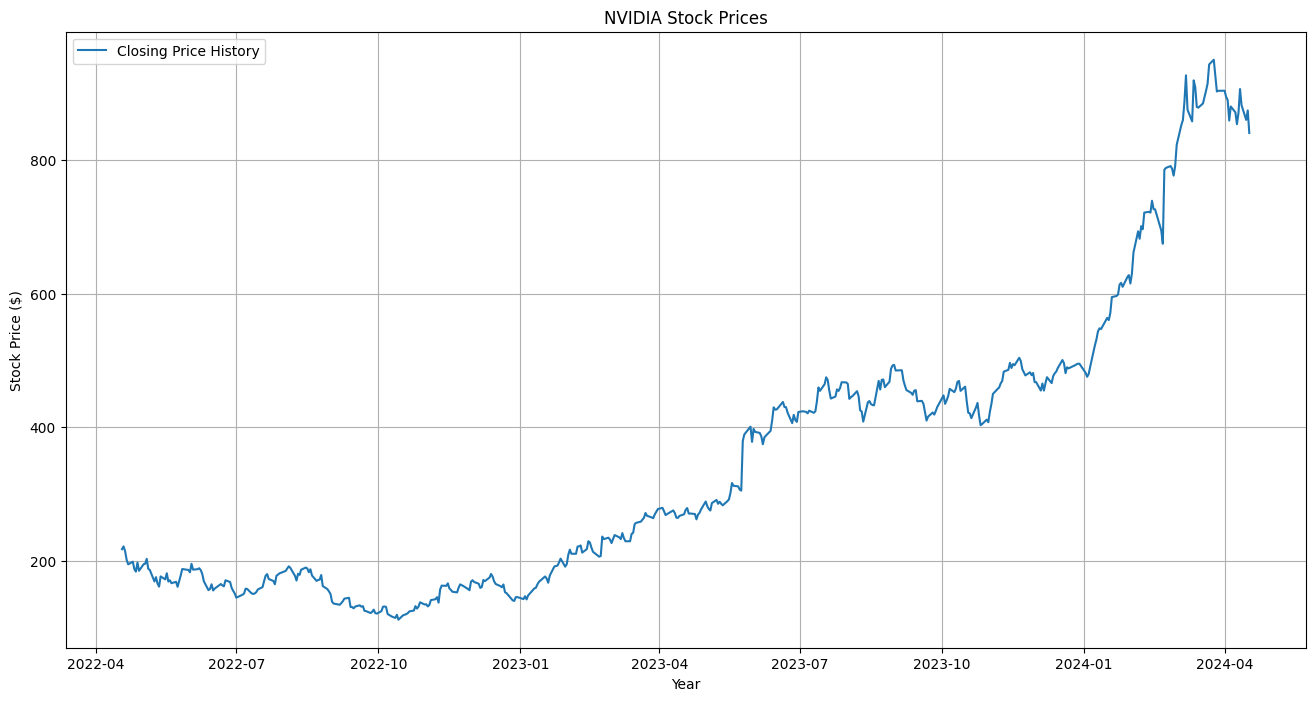

In [22]:
# import the closing price data of META stock for the period of 2 years
df = pd.read_csv('NVDA.csv')

# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

# sort by datetime
df.sort_values(by='Date', inplace=True, ascending=True)

plt.figure(figsize = (16,8))
plt.title('NVIDIA Stock Prices')
plt.plot(df['Date'], df['Close'], label = 'Closing Price History')
plt.legend(loc = "upper left")
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.grid()
plt.show()

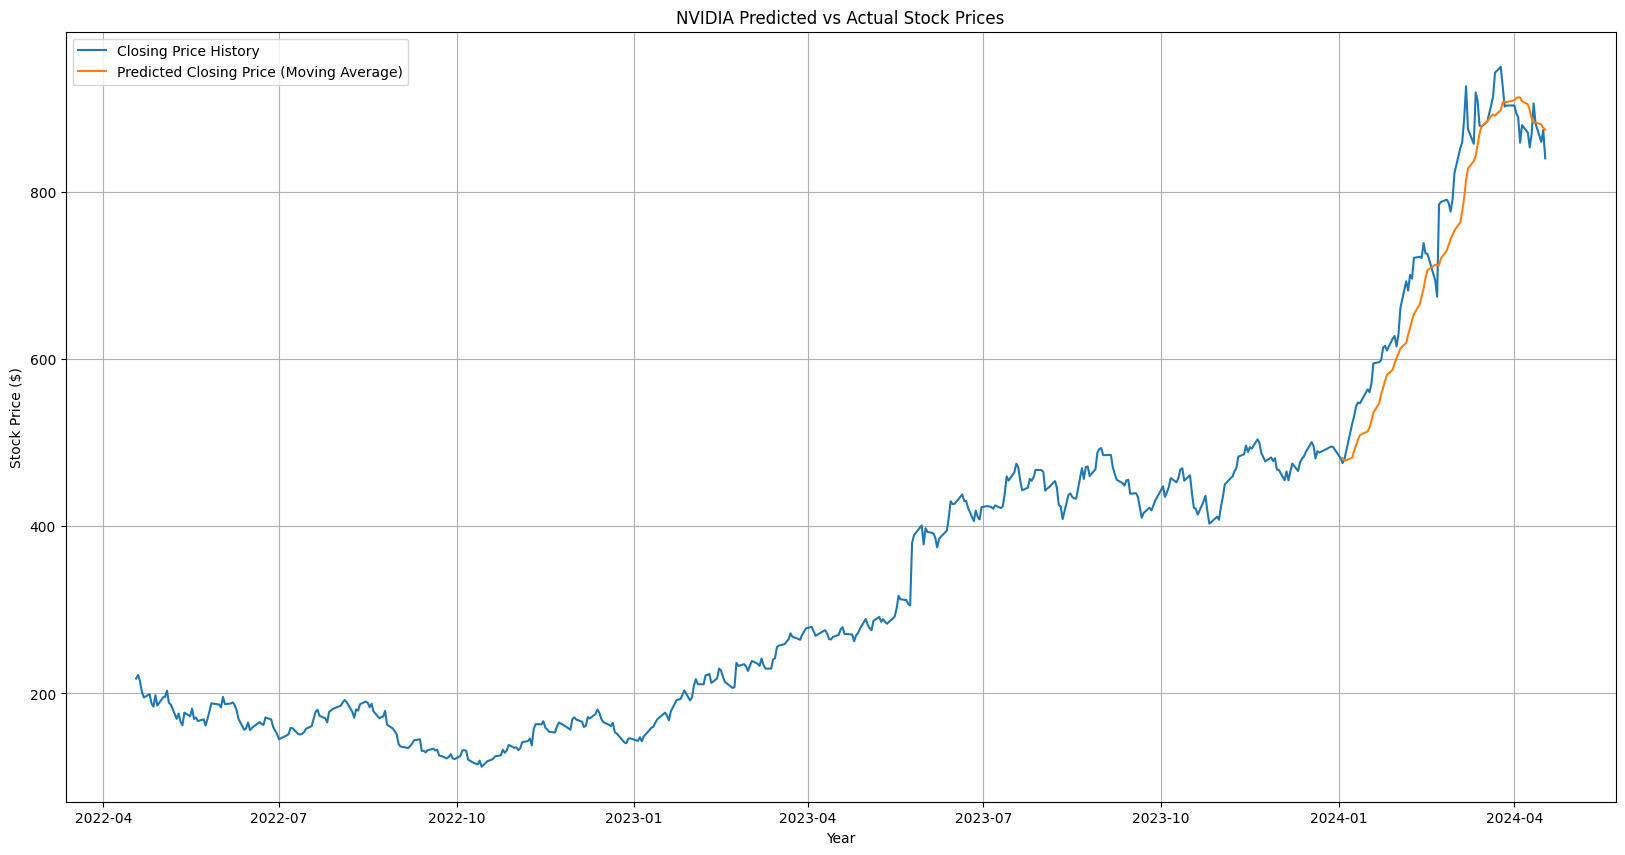

Root Mean Squared Error: 45.63447708832931
Mean Absolute Percentage Error (%): 5.296376611256663


In [23]:
test_size = 0.2
training_size = 1 - test_size

test_num = int(test_size * len(df))
train_num = int(training_size * len(df))

train_end_date = '2024-01-01'
train = df[df['Date'] <= train_end_date]
test = df[df['Date'] > train_end_date]

preds = []
for i in range(0, test.shape[0]):
    a = train['Close'][len(train) - test.shape[0] + i:].sum() + test['Close'][:i].sum()
    b = a/test.shape[0]
    preds.append(b)


# Calculate the moving average with a rolling window
window_size = 10
test['Predictions_ma'] = test['Close'].rolling(window=window_size, min_periods=1).mean().shift(1)

# Fill any missing values in predictions using forward fill
test['Predictions_ma'].fillna(method='ffill', inplace=True)

combined_data = pd.concat([train, test])

#test['Predictions_ma'] = preds
plt.figure(figsize = (20,10))
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.plot(combined_data['Date'], combined_data['Close'], label='Closing Price History')
plt.plot(test['Date'], test['Predictions_ma'], label='Predicted Closing Price (Moving Average)')
plt.legend(loc = "upper left")
plt.title('NVIDIA Predicted vs Actual Stock Prices')
plt.grid()
plt.show()

def get_mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def get_rmse(y_true, y_pred):
    rmse = np.sqrt(np.mean(np.power((y_true - y_pred),2)))
    return rmse

# Evaluate performance

# Drop rows with missing predictions
test = test.dropna(subset=['Predictions_ma'])

# Evaluate performance
if test['Close'].isnull().any() or test['Predictions_ma'].isnull().any():
    print("Error: There are missing values in the test data or predictions.")
else:
    rmse_ma = get_rmse(test['Close'], test['Predictions_ma'])
    print('Root Mean Squared Error: ' + str(rmse_ma))
    mape_ma = get_mape(test['Close'], test['Predictions_ma'])
    print('Mean Absolute Percentage Error (%): ' + str(mape_ma))